<a href="https://colab.research.google.com/github/Xolmatovorzu/prediction/blob/main/Toshkent_shahri_uy_narxlarini_bashorat_qilish(Forecasting_the_price_of_houses_in_Tashkent)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda bizning vazifamiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

**1-Bosqich** Bizning buyurtmachingiz  Kompaniya keyingi uylarini qurishda Toshkent shahrining uylarning taxminiy narxini hisoblab chiqadigan model (dastur) so'rayapti.
Bizga berilgan ma'lumotlar: Toshkent shahri aholini uy sotib olish uyning narxini taxminiy xisoblab berish.


In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi



1.2 **Analitik yondoshuvni baholash**
1.**Modelni tanlash** bu yerda ma'lumotlarni yigib kiritamiz shuning uchun Nazorat ostida bo'ladi
2.•**	Algoritm** Bu yerda bashoratlash amalarini bajaramiz, shuning uchun Regresiya algoritmini tanlaymiz.
3.**Ma'lumotlarni kiritish**. Ofline

**2.Ma'lumotlarni o'rganish**

In [ ]:
#ma'lumotlarni ko'rib olamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df['size']

0       57
1       52
2       42
3       65
4       70
        ..
7560    38
7561    49
7562    64
7563    18
7564    30
Name: size, Length: 7565, dtype: object

In [ ]:
#df = df.astype({"size": int, "price": int})
#df=df[['price']] = df[['price']].astype(float)

In [ ]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [ ]:
df['district'] = df['district'].replace({'Not Available': np.nan})

df['price']=df['price'].replace({'Not Available':np.nan})
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df['size']=pd.to_numeric(df['size'], errors='coerce')
df['price']=pd.to_numeric(df['price'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [ ]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [ ]:
df['rooms'].isna().sum()

0

In [ ]:
df['size'].isna().sum()

1

In [ ]:
df['level'].isna().sum()

0

In [ ]:
df['max_levels'].isna().sum()

0

In [ ]:
df['price'].isna().sum()

99

In [ ]:
df.isnull().sum()

location       0
district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [ ]:
if 'location' in df.columns:
  df.drop('location', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [ ]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   object 
 1   rooms       7465 non-null   int64  
 2   size        7465 non-null   float64
 3   level       7465 non-null   int64  
 4   max_levels  7465 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 408.2+ KB


In [ ]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price         1.000000
rooms         0.056161
max_levels    0.011175
level         0.003449
size          0.001106
dtype: float64

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder() 
#matnlarni 0 va 1 ga aylantiramiz
#df['district']=labelencoder.fit_transform(df['district'].values)
#df['district'].value_counts()

In [ ]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df = scaler.fit_transform(df)

In [ ]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [ ]:
dict2 = {'Юнусабадский':1, 'Яккасарайский':2, 'Чиланзарский':3, 'Учтепинский':4,
       'Мирзо-Улугбекский':5, 'Яшнободский':6, 'Мирабадский':7,
       'Шайхантахурский':8, 'Олмазорский':9, 'Сергелийский':10, 'Янгихаётский':11,
       'Бектемирский':12}
df['district'] = df['district'].map(dict2)
df.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,district,rooms,size,level,max_levels,price
0,1,3,57.0,4,4,52000.0
1,2,2,52.0,4,5,56000.0
2,3,2,42.0,4,4,37000.0
3,3,3,65.0,1,4,49500.0
4,3,3,70.0,3,5,55000.0


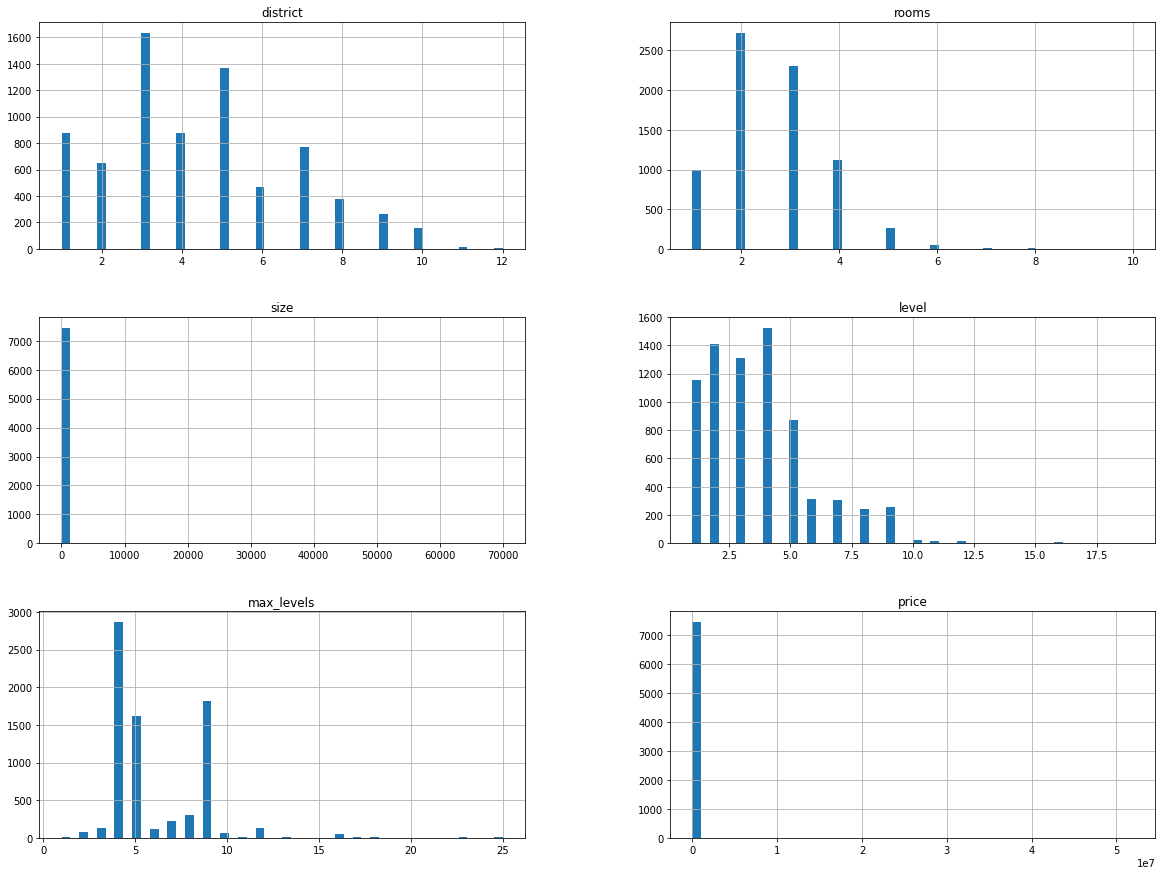

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df['price'].unique()

array([5.20000e+04, 5.60000e+04, 3.70000e+04, 4.95000e+04, 5.50000e+04,
       2.55000e+04, 2.12000e+04, 2.00000e+04, 2.62000e+04, 2.22000e+04,
       2.42000e+04, 3.02000e+04, 2.25000e+04, 3.25000e+04, 4.50000e+04,
       4.70000e+04, 4.99000e+04, 7.60000e+04, 6.50000e+04, 4.75000e+04,
       3.00000e+04, 3.20000e+04, 4.40000e+04, 5.65000e+04, 3.50000e+04,
       2.35000e+04, 6.05000e+04, 6.80000e+04, 4.15000e+04, 5.25000e+04,
       4.30000e+04, 8.00000e+04, 4.20000e+04, 2.30000e+04, 8.87840e+04,
       9.70000e+04, 2.85000e+04, 3.45000e+04, 5.10000e+04, 4.80000e+04,
       4.00000e+04, 6.70000e+04, 4.05000e+04, 5.40000e+04, 3.60000e+04,
       6.30000e+04, 6.35000e+04, 7.00000e+04, 9.10000e+04, 8.30000e+04,
       1.97650e+04, 5.00000e+04, 8.60000e+04, 3.15000e+04, 2.65000e+04,
       1.45000e+04, 2.70000e+04, 5.95000e+04, 4.72990e+04, 3.80000e+04,
       2.95000e+04, 6.15000e+04, 4.65000e+04, 5.84000e+04, 2.60000e+04,
       1.05000e+05, 5.35000e+04, 1.25000e+04, 1.07000e+05, 3.941

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   int64  
 1   rooms       7465 non-null   int64  
 2   size        7465 non-null   float64
 3   level       7465 non-null   int64  
 4   max_levels  7465 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 408.2 KB


In [ ]:
df['price']

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7465, dtype: float64

In [ ]:
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
#train_set
#test_set.shape


In [ ]:
#train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 4552 to 7270
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    6052 non-null   int64  
 1   rooms       6052 non-null   int64  
 2   size        6051 non-null   float64
 3   level       6052 non-null   int64  
 4   max_levels  6052 non-null   int64  
 5   price       5971 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 331.0 KB


In [ ]:
#test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 132 to 333
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    1513 non-null   int64  
 1   rooms       1513 non-null   int64  
 2   size        1513 non-null   float64
 3   level       1513 non-null   int64  
 4   max_levels  1513 non-null   int64  
 5   price       1495 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 82.7 KB


In [ ]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price         1.000000
rooms         0.056161
max_levels    0.011175
district      0.008265
level         0.003449
size          0.001106
dtype: float64

In [ ]:
x=df.drop(['price'], axis=1).values
y=df['price']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)



In [ ]:
#y=y/y.max()
y

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7465, dtype: float64

In [ ]:
x.shape

(7465, 5)

In [ ]:
y.shape

(7465,)

In [ ]:
y

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7465, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
x_train

array([[ 0.25494501, -0.57438197, -0.04899014,  0.58398381, -0.3927912 ],
       [-0.60098686, -1.49767253, -0.05165493,  0.1369077 , -0.77638439],
       [ 0.25494501, -0.57438197, -0.03899719,  0.1369077 , -0.3927912 ],
       ...,
       [ 1.53884283, -0.57438197, -0.03899719,  0.1369077 ,  1.14158154],
       [ 0.25494501,  4.04207085,  0.0522718 ,  1.92521213,  1.14158154],
       [-0.60098686, -0.57438197, -0.04166198, -1.20432062, -0.77638439]])

In [ ]:
x_test

array([[ 0.25494501, -0.57438197, -0.04366057, -1.20432062, -0.77638439],
       [-1.0289528 , -0.57438197, -0.02900423,  1.92521213,  1.14158154],
       [ 0.68291095, -0.57438197, -0.04232817, -1.20432062, -0.3927912 ],
       ...,
       [-0.17302092,  0.3489086 , -0.02900423, -0.75724452, -0.3927912 ],
       [ 1.53884283,  0.3489086 , -0.02767184, -0.75724452, -0.3927912 ],
       [-0.60098686, -0.57438197, -0.04565916,  0.1369077 , -0.77638439]])

In [ ]:
y_train

1889     31500.0
948      24500.0
1036     37000.0
1637     77000.0
7220     24200.0
          ...   
3664     75000.0
6090     38800.0
5837     33000.0
6646    155000.0
7212     25200.0
Name: price, Length: 5972, dtype: float64

In [ ]:
y_test

2749    50000.0
282     48000.0
1812    42000.0
1184    63000.0
6305    23500.0
         ...   
3623    88000.0
1697    67000.0
6126    43500.0
6578    40000.0
2995    37500.0
Name: price, Length: 1493, dtype: float64

In [ ]:
y_test=np.array(y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
x_train

array([[ 0.25494501, -0.57438197, -0.04899014,  0.58398381, -0.3927912 ],
       [-0.60098686, -1.49767253, -0.05165493,  0.1369077 , -0.77638439],
       [ 0.25494501, -0.57438197, -0.03899719,  0.1369077 , -0.3927912 ],
       ...,
       [ 1.53884283, -0.57438197, -0.03899719,  0.1369077 ,  1.14158154],
       [ 0.25494501,  4.04207085,  0.0522718 ,  1.92521213,  1.14158154],
       [-0.60098686, -0.57438197, -0.04166198, -1.20432062, -0.77638439]])

In [ ]:
y_train

1889     31500.0
948      24500.0
1036     37000.0
1637     77000.0
7220     24200.0
          ...   
3664     75000.0
6090     38800.0
5837     33000.0
6646    155000.0
7212     25200.0
Name: price, Length: 5972, dtype: float64

In [ ]:
y_predict=knn.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_predict,y_test, )
RMSE = np.sqrt(mean_squared_error(y_predict,y_test ))
print(MAE)
print(RMSE)

50121.69256530476
1345063.734325705
